In [14]:
import torch
import torch.nn  as nn

In [12]:
# first we create a dataset


N = 100
true_weight = 2.5
true_bias = -1.0
sigma = 3

x = torch.linspace(0, 10, N).unsqueeze(1)


y = true_weight * x + true_bias + sigma * torch.randn_like(x)


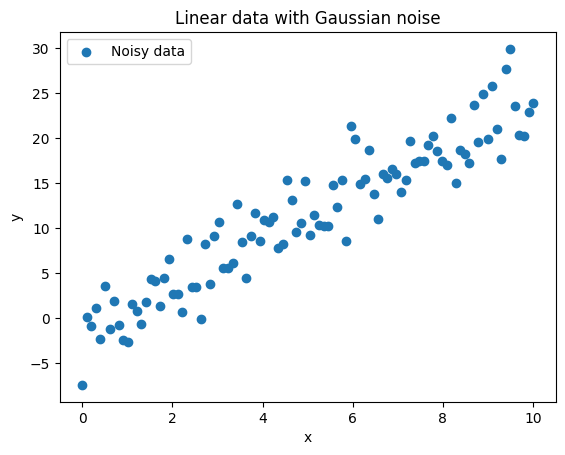

In [13]:
#visualize the data
import matplotlib.pyplot as plt

plt.scatter(x.numpy(), y.numpy(), label="Noisy data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear data with Gaussian noise")
plt.legend()
plt.show()


In [23]:
#spilt the dataset into training and test sets randomly

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x = x.to(device)
y = y.to(device)


train_size = int(0.8 * N)

# Shuffle indices
indices = torch.randperm(N, device=device)

train_idx = indices[:train_size]
pred_idx  = indices[train_size:]

x_train = x[train_idx]
y_train = y[train_idx]

x_pred = x[pred_idx]
y_pred = y[pred_idx]


In [24]:
#create the model

class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  

    def forward(self, x):
        return self.linear(x)

In [85]:
#setup before training

import torch.optim as optim

models = [RegressionModel().to(device) for i in range(3)]

loss_functions = [nn.MSELoss(),nn.L1Loss(),nn.HuberLoss()]

# same optimizer for all the loss functions 

optimizers = [optim.Adam(models[i].parameters(), lr=0.005) for i in range(3)]

#same number of epochs for all loss functions

epochs = 1000

losses = [[],[],[]]

In [86]:
#training loop

for epoch in range(epochs):
    for i in range(3):
        y_hat = models[i](x_train)
        loss_fn = loss_functions[i]
        loss = loss_fn(y_hat,y_train)

        optimizers[i].zero_grad()
        loss.backward()
        optimizers[i].step()

        losses[i].append(loss.item())

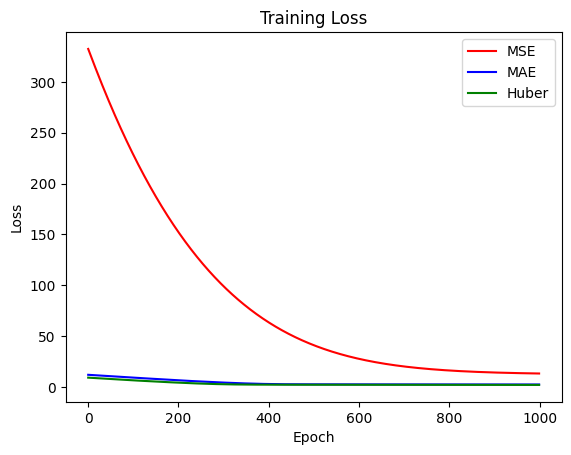

In [91]:


plt.plot(losses[0],color = "red",label = "MSE")
plt.plot(losses[1],color = "blue",label = "MAE")
plt.plot(losses[2],color = "green",label = "Huber")


plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.savefig("loss_curves.png")
plt.show()


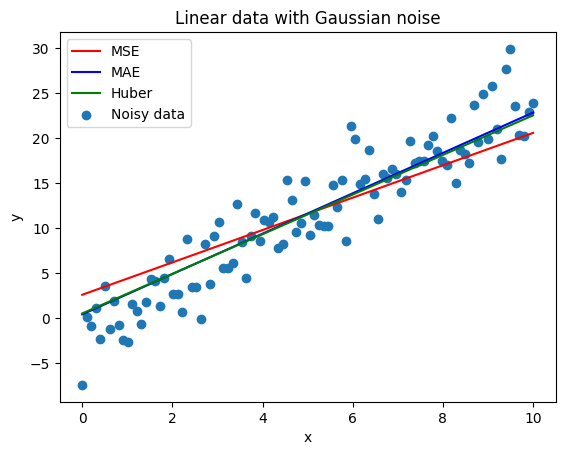

In [92]:


learned_parameters = [(models[i].linear.weight.item(),models[i].linear.bias.item()) for i in range(3)]


x_values = [0,10]
y_values = [[i[0]*j+i[1] for j in x_values] for i in learned_parameters]


plt.plot(x_values, y_values[0], color = "red",label = "MSE")
plt.plot(x_values, y_values[1], color = "blue",label = "MAE")
plt.plot(x_values, y_values[2], color = "green",label = "Huber")


plt.scatter(x.to("cpu").numpy(), y.to("cpu").numpy(), label="Noisy data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend
plt.title("Linear data with Gaussian noise")
plt.legend()
plt.savefig("lines.png")
plt.show()


In [93]:
torch.save(models[0].state_dict(), "model_mse.pt")
torch.save(models[1].state_dict(), "model_mae.pt")
torch.save(models[2].state_dict(), "model_huber.pt")
